In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(type(x_train))
print(np.unique(y_train))

(60000, 28, 28)
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]


In [4]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
shape_of_input = x_train.shape[1:]
print(shape_of_input)

(28, 28, 1)


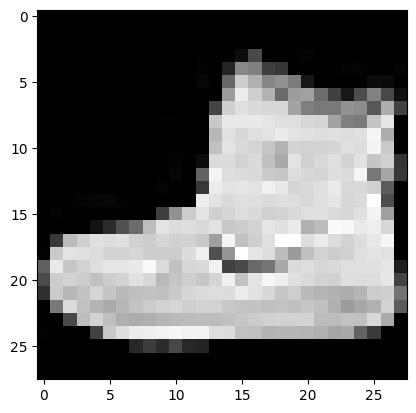

9


In [8]:
plt.imshow(x_train[0], cmap = 'gray')
plt.show()
print(y_train[0])

In [9]:
class CNN(tf.keras.Model):

  def __init__(self, num_classes, shape_of_input, pool = (2,2), conv_filters = 128, filter_dim= (2,2), n_conv = 2, n_dense = 2, n_neurons = 128, activation = 'relu', dropout = 0.10):
    super(CNN, self).__init__()
    self.num_classes = num_classes
    self.conv_filters = conv_filters
    self.filter_dim = filter_dim
    self.n_conv = n_conv
    self.n_dense = n_dense
    self.n_neurons = n_neurons
    self.activation = activation
    self.dropout = dropout
    self.shape_of_input = shape_of_input

    # loop to create layers
    self.netlayers = []
    self.netlayers.append(layers.Conv2D(conv_filters, kernel_size = filter_dim, activation = activation, input_shape = shape_of_input))
    self.netlayers.append(layers.MaxPooling2D(pool))
    for i in range(n_conv):
      self.netlayers.append(layers.Conv2D(conv_filters, kernel_size = filter_dim, activation = activation))
      self.netlayers.append(layers.MaxPooling2D(pool))

    self.netlayers.append(layers.Flatten())

    for i in range(n_dense):
      self.netlayers.append(layers.Dense(n_neurons, activation = activation, kernel_regularizer= tf.keras.regularizers.L2(0.01)))
      self.netlayers.append(layers.Dropout(rate=dropout))

    self.outputs = self.netlayers.append(layers.Dense(num_classes, activation = 'softmax'))
    self.model = tf.keras.Sequential(self.netlayers)

  def call(self,x):
    return self.model(x)

In [10]:
model = CNN(conv_filters = 16, shape_of_input= shape_of_input, filter_dim = (2,2), activation = 'relu',n_dense = 1, n_neurons= 32, n_conv = 2, num_classes = len(np.unique(y_train)))

In [11]:
model.build(input_shape = (None, 28, 28, 1))

In [12]:
model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        1040      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 16)          1040      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0       

In [13]:
from tensorflow.keras.utils import plot_model

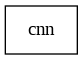

In [14]:
plot_model(model, show_shapes = True, show_layer_names= True, show_layer_activations= True)

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
num_epochs = 20

In [17]:
model.fit(x_train, y_train, epochs = num_epochs)

Epoch 1/20
1875/1875 [==============================] - 19s 5ms/step - loss: 0.9203 - accuracy: 0.7005
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6190 - accuracy: 0.7937
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5523 - accuracy: 0.8142
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5206 - accuracy: 0.8236
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4954 - accuracy: 0.8317
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4803 - accuracy: 0.8352
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4698 - accuracy: 0.8389
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4583 - accuracy: 0.8431
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4517 - accuracy: 0.8459
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.44

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4087 - accuracy: 0.8603


In [19]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [20]:
first = model.predict(x_test[0:1])
result = np.argmax(first)
print(result)

1/1 [==============================] - 0s 129ms/step
9


In [21]:
x_test[0:1].shape

(1, 28, 28, 1)

In [22]:
y_test[0]

9

In [23]:
# labels mapping:
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9:'Boot'}

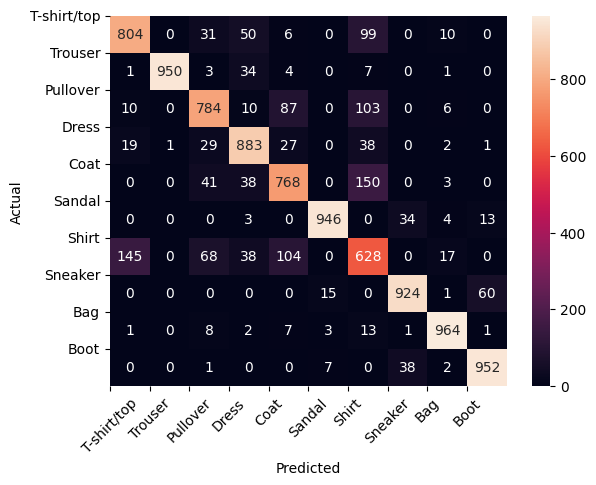

In [24]:
# generating the confusion matrix :
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
# plotting the confusion matrix:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=range(len(labels)), labels=labels.values(), rotation=45) # Set x-axis labels
plt.yticks(ticks=range(len(labels)), labels=labels.values(), rotation=0) # Set y-axis labels
plt.show()

In [26]:
# saving the model:
# must save to .tf (tensorflow) file format because we are using Subclassing API, as opposed to sequential, functional API in which case it would be .hf5, .hdf5
model.save('model.tf')

In [27]:
# loading the model:
model = keras.models.load_model('model.tf')

In [29]:
# testing the model on images from outside the original data:
import os
import cv2 as cv

In [30]:
path = '/content/shirt.png'

In [33]:
img = cv.imread(path)
img.shape

(28, 28, 3)

In [34]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img.shape

(28, 28)

In [35]:
img = img.reshape(-1, 28, 28, 1)

In [37]:
img.shape

(1, 28, 28, 1)

In [38]:
img = img/ 255.0

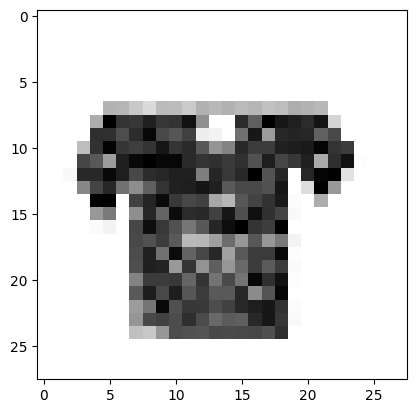

In [41]:
plt.imshow(img[0], cmap = 'gray')
plt.show()

In [43]:
# feeding the new image into the model:
outside = model.predict(img)
out_pred = np.argmax(img)
print(out_pred, labels[out_pred])

1/1 [==============================] - 0s 33ms/step
0 T-shirt/top
